In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [2]:
from xinput import X
X=np.array(X)

In [3]:
y=pd.read_csv("new raag names.csv")
y

,Ragas
0,Raag Aahir Bhairav
1,Raag Aahir Bhairav
2,Raag Aahir Bhairav
3,Raag Aahir Bhairav
4,Raag Aahir Bhairav
...,...
1249,Raag Sawani
1250,Raag Sawani
1251,Raag Sawani
1252,Raag Sawani


In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))


le = preprocessing.LabelEncoder()
y=le.fit_transform(y)



C:\Users\mishr\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
X.shape

(1254, 120)

In [6]:
X=np.array(X)

In [7]:
X=X.reshape(1254,10,12)
X.shape

(1254, 10, 12)

In [8]:
y.shape

(1254,)

In [9]:
y

array([ 5,  5,  5, ..., 60, 60, 60])

In [10]:
########## CNN  ##########

In [11]:
def prepare_datasets(test_size, validation_size):
    
    
    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [85]:

def build_model(input_shape):
    

    # build network topology
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (1, 1), activation='relu', input_shape=input_shape))###change h kuki kam dim h x me
    model.add(keras.layers.MaxPooling2D((1, 1), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    '''# 2nd conv layer
    model.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
    model.add(keras.layers.MaxPooling2D((1, 1), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())'''

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
    model.add(keras.layers.MaxPooling2D((1, 1), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(74, activation='softmax'))

    return model


In [86]:
def predict(model, X, y):


    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)  (1, 64, 14, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [14]:
X[0].shape

(10, 12)

In [87]:

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 10, 12, 32)        64        
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 5, 6, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_44 (Bat  (None, 5, 6, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 5, 6, 32)          1056      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                     

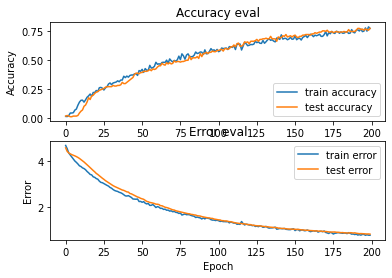

10/10 - 0s - loss: 0.7677 - accuracy: 0.7643 - 40ms/epoch - 4ms/step

Test accuracy: 0.7643312215805054
Target: 7, Predicted label: [7]


In [130]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (10,12,1)
    model = build_model(input_shape)
   
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=200)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[1]
    y_to_predict = y_test[1]

    # predict sample
    predict(model, X_to_predict, y_to_predict)
  

In [131]:

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(X_test), axis=-1)

In [132]:

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix, recall_score, precision_recall_curve

In [133]:

history_dict =history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [134]:
#y: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='weighted')
print('F1 score: %f' % f1)
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa Score: %f' % kappa)

Accuracy: 0.764331
Precision: 0.792897
Recall: 0.764331
F1 score: 0.755016
Cohens kappa Score: 0.757885


C:\Users\mishr\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
print("val_accuracy:",history_dict["val_accuracy"][-1])
print("loss:",history_dict["loss"][-1])
print("val_loss:",history_dict["val_loss"][-1])



val_accuracy: 0.7765957713127136
loss: 0.7510672211647034
val_loss: 0.7993635535240173
